In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv("archive/athletes.csv")
df = df[ (df['sport'] == "basketball") | (df['sport'] == "cycling")]
df = df.loc[df["sex"] == "male"]
df = df.loc[:, ["height", "weight", "sport"]]
df = df.dropna(axis=0)
df["height"] *= 100

In [14]:
sports = []
for i in df["sport"]:
    sports.append(1 if i == "basketball" else 0)
df["sport"] = sports
# X = np.c_[df["height"], df["weight"]]
# y = np.array(sports)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Create Table of min/max/mean/standard deviation/and signal-to-noise ratio

In [ ]:
table_info = [["Category", "Minimum", "Maximum", "Mean", "Standard Deviation", "SNR"]]
def addTable(name, l):
    table_info.append([name, np.min(l), np.max(l), np.mean(l), np.std(l), np.mean(l)/ np.std(l)])


b_df = df.loc[df["sport"] == 1]
bh = np.array(b_df["height"])
addTable("Basketball Heights", bh)
bw = np.array(b_df["weight"])
addTable("Basketball Weights", bw)
c_df = df.loc[df["sport"] == 0]
ch = np.array(c_df["height"])
addTable("Cycling Heights", ch)
cw = np.array(c_df["weight"])
addTable("Cycling Weights", cw)

the_table = plt.table(cellText=table_info, loc='center')
the_table.scale(1.5, 1.5)
plt.axis('off')
plt.show()

Question 3

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

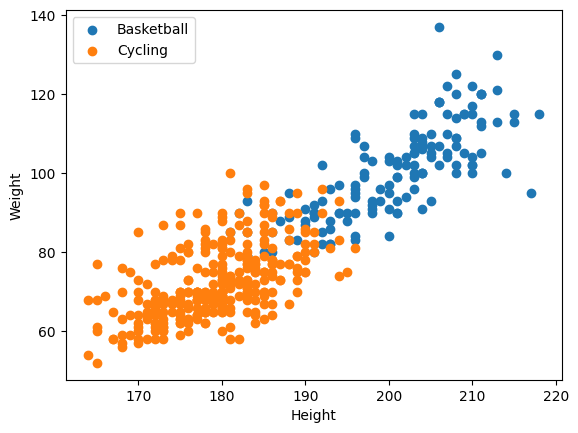

In [29]:
plt.scatter(b_df["height"], b_df["weight"])
plt.scatter(c_df["height"], c_df["weight"])
plt.legend(labels=["Basketball", "Cycling"])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot

Question 4

In [18]:
from sklearn.model_selection import KFold
splits = KFold(n_splits=10)

X = np.c_[df["height"], df["weight"]]
y = np.array(sports)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Question 5

In [ ]:
table_info = [["Nieghbors", "Mean", "Standard Deviation"]]
# def addTable(mean, std):
    # table_info.append([name, np.min(l), np.max(l), np.mean(l), np.std(l), np.mean(l)/ np.std(l)])

for n in range(1,22,2):
    scores = []
    for train_index, val_index in splits.split(X_train):
        neigh = KNeighborsClassifier(n_neighbors=n)
        X_subtrain = X_train[train_index]
        X_val = X_train[val_index]
        y_subtrain = y_train[train_index]
        y_val = y_train[val_index]
        neigh.fit(X_subtrain, y_subtrain)
        y_predict = neigh.predict(X_val)
        scores.append(accuracy_score(y_val, y_predict))
    table_info.append([n, np.mean(scores), np.std(scores)])

the_table = plt.table(cellText=table_info, loc='center')
the_table.scale(1.5, 1.5)
plt.axis('off')
plt.show()


Question 6

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=19)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_train)
print("Training: ", accuracy_score(y_train, y_predict))
y_predict = neigh.predict(X_test)
print("Testing: ", accuracy_score(y_test, y_predict))


Question 7

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

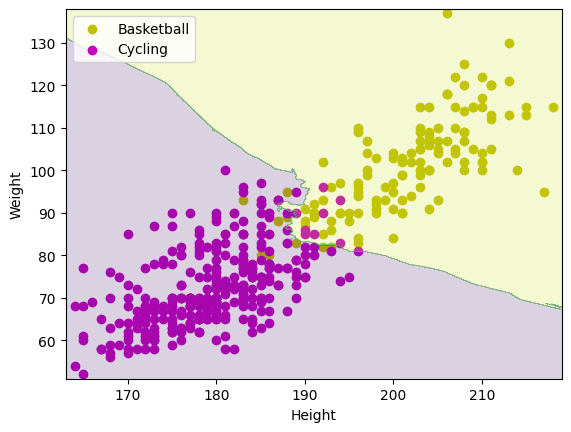

In [28]:
x_min = np.min(X[:,0]) - 1
x_max = np.max(X[:,0]) + 1
y_min = np.min(X[:,1]) - 1
y_max = np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

new_X = np.c_[xx.ravel(), yy.ravel()]
new_y = neigh.predict(new_X)
zz = new_y.reshape(xx.shape)

plt.scatter(b_df["height"], b_df["weight"], label = "Basketball", c='y')
plt.scatter(c_df["height"], c_df["weight"], label = "Cycling", c='m')
plt.legend(labels = ["Basketball", "Cycling"])
plt.contourf(xx, yy, zz, alpha=0.2)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot
